In [1]:
import random
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions
from deap import tools, base, creator
import seaborn as sns

sys.path.append("../")
from calculus.term import *
from calculus.strategy import *
from calculus.generation import gen_filtered_lambda_terms_v2

from calculus_utils.drawing import *
from calculus_utils.algorithms import *

from vd_env.lambda_env import LambdaEnv
from vd_env.run_greedy_policy import run_greedy_policy
from vd_env.run_e_greedy_policy import run_e_greedy_policy

In [2]:
UPLIMIT = 60
DOWNLIMIT = 50
LAMBDA_TERM_COUNT = 200
RANDOM_AVERAGE_COUNT = 20

terms, stepsLO = gen_filtered_lambda_terms_v2(count_terms=LAMBDA_TERM_COUNT,
                                              down_vertices_limit=DOWNLIMIT,
                                              up_vertices_limit=UPLIMIT)

countVertices = list(map(lambda term: term.verticesNumber, terms))
countRedexes = list(map(lambda term: len(term.redexes), terms))

print(f"number of lambda terms {len(terms)}")
print("number of vertices= {}".format(countVertices))
print("number of redexes= {}".format(countRedexes))

print("number of steps to normalize using LO strategy= {}".format(stepsLO))
print(f"number of terms with normal form {len(terms)}")

print("number of steps to normalize using LO strategy= {}".format(stepsLO))

stepsRI = [term.normalize(RightmostInnermostStrategy())[1] for term in terms]
print("number of steps to normalize using RI strategy= {}".format(stepsRI))

stepsRand = [
    sum([term.normalize(RandomStrategy())[1] for i in range(RANDOM_AVERAGE_COUNT)])
    / RANDOM_AVERAGE_COUNT
    for term in terms
]
print("number of steps to normalize using Random strategy= {}".format(stepsRand))

number of lambda terms 201
number of vertices= [52, 56, 54, 51, 59, 56, 59, 57, 52, 54, 51, 55, 58, 52, 51, 57, 51, 51, 58, 52, 55, 55, 55, 58, 52, 53, 51, 55, 57, 52, 52, 51, 59, 59, 53, 51, 56, 53, 54, 59, 52, 59, 58, 51, 52, 56, 51, 53, 59, 55, 53, 56, 52, 57, 51, 56, 53, 54, 58, 55, 58, 51, 59, 54, 58, 59, 58, 59, 56, 57, 53, 59, 51, 59, 56, 59, 55, 55, 56, 53, 59, 52, 56, 56, 56, 56, 53, 56, 56, 56, 59, 52, 58, 52, 54, 53, 52, 53, 51, 55, 53, 52, 57, 51, 59, 51, 57, 53, 56, 55, 54, 53, 56, 52, 53, 57, 53, 52, 57, 56, 59, 54, 56, 54, 57, 51, 56, 55, 53, 53, 59, 54, 55, 52, 59, 51, 56, 52, 53, 56, 54, 54, 57, 53, 57, 54, 56, 54, 52, 53, 52, 57, 57, 54, 52, 52, 58, 56, 56, 58, 59, 54, 52, 51, 53, 53, 56, 59, 54, 57, 54, 51, 52, 55, 58, 56, 57, 51, 54, 53, 57, 53, 57, 51, 54, 55, 59, 55, 51, 51, 53, 54, 55, 54, 57, 52, 54, 58, 57, 57, 52]
number of redexes= [7, 8, 4, 7, 8, 10, 5, 4, 3, 8, 3, 5, 8, 3, 6, 5, 7, 8, 7, 6, 6, 5, 5, 7, 6, 9, 5, 3, 6, 7, 6, 4, 8, 6, 7, 6, 6, 2, 7, 4, 7, 4, 4

In [3]:
print("max cound LO: {}".format(max(stepsLO)))
print("max cound RI: {}".format(max(stepsRI)))
print("max cound Rand: {}".format(max(stepsRand)))

max cound LO: 155
max cound RI: inf
max cound Rand: 102.5


In [5]:
max_count_steps_rlenv = 150
strategies_env = [LeftmostOutermostStrategy(), RightmostInnermostStrategy()]

explore_actions = 100
epsilon = 0.1

In [6]:
lambda_env = LambdaEnv(
    strategies=strategies_env,
    lambda_terms=terms,
    max_step_term=max_count_steps_rlenv,
    count_terms=LAMBDA_TERM_COUNT,
)

In [7]:
lambda_env, rewards_e_greedy = run_e_greedy_policy(
    lambda_env,
    exploration=explore_actions,
    max_term_reward=max_count_steps_rlenv,
    epsilon=epsilon,
    deterministic=True,
    is_action_based=True,
)

In [8]:
lambda_env.reset_soft()
lambda_env, rewards_e_greedy_non_d = run_e_greedy_policy(
    lambda_env,
    exploration=explore_actions,
    max_term_reward=max_count_steps_rlenv,
    epsilon=epsilon,
    deterministic=False,
    is_action_based=True,
)

In [9]:
steps_e_greedy = [max_count_steps_rlenv - rew for rew in rewards_e_greedy]
steps_e_greedy_non_d = [max_count_steps_rlenv - rew for rew in rewards_e_greedy_non_d]

In [10]:
print("count steps to norm by e-Greedy policy = {}".format(steps_e_greedy))
print(
    "count steps to norm by e-Greedy policy non det = {}".format(steps_e_greedy_non_d)
)

count steps to norm by e-Greedy policy = [14, 2, 7, 19, 5, 4, 24, 2, 17, 9, 9, 6, 11, 3, 15, 5, 2, 12, 72, 6, 24, 7, 15, 7, 13, 45, 11, 17, 10, 14, 84, 12, 8, 7, 7, 7, 20, 3, 12, 11, 14, 5, 5, 17, 9, 7, 11, 17, 9, 4, 14, 24, 8, 11, 5, 28, 11, 16, 6, 4, 8, 5, 10, 9, 7, 47, 9, 5, 14, 1, 15, 5, 11, 14, 12, 16, 9, 5, 15, 5, 4, 8, 2, 5, 21, 7, 4, 2, 20, 18, 6, 3, 8, 4, 4, 23, 5, 4, 7, 9, 4, 7, 4, 8, 8, 7, 9, 23, 9, 8, 3, 17, 9, 13, 10, 6, 25, 4, 23, 7, 5, 16, 7, 11, 2, 7, 9, 17, 17, 8, 4, 149, 20, 3, 6, 11, 18, 4, 6, 5, 33, 6, 56, 5, 34, 15, 7, 10, 8, 18, 7, 7, 3, 2, 46, 14, 15, 7, 11, 11, 78, 5, 16, 13, 5, 7, 7, 35, 8, 8, 4, 14, 7, 5, 9, 17, 9, 14, 7, 8, 10, 12, 12, 9, 12, 8, 2, 7, 20, 12, 10, 6, 9, 7, 3, 21, 17, 149, 10, 8]
count steps to norm by e-Greedy policy non det = [14, 2, 7, 19, 5, 4, 24, 2, 17, 5, 9, 6, 4, 3, 13, 3, 1, 11, 7, 8, 16, 7, 7, 7, 11, 11, 57, 12, 10, 28, 120, 12, 8, 7, 6, 3, 22, 3, 20, 13, 2, 5, 7, 16, 7, 1, 11, 7, 5, 4, 21, 26, 6, 15, 5, 13, 10, 9, 3, 4, 6, 5, 8, 3, 5

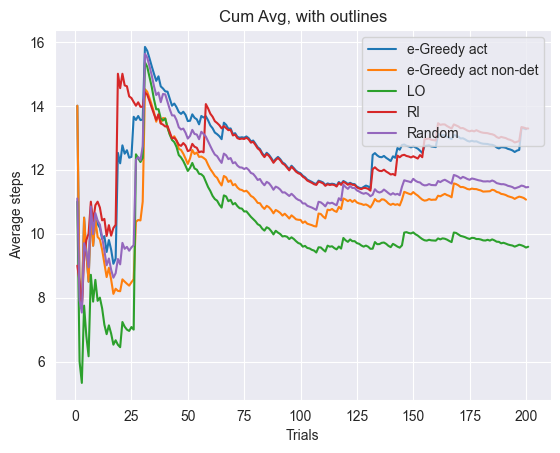

In [11]:
comp_data = {
    "e-Greedy act": (steps_e_greedy, "-"),
    "e-Greedy act non-det": (steps_e_greedy_non_d, "-"),
    "LO": (stepsLO, "-"),
    "RI": ([step if step != np.inf else 100 for step in stepsRI], "-"),
    "Random": ([step if step != np.inf else 100 for step in stepsRand], "-"),
}

draw_cumulative_avg_comparison(comp_data, title="Cum Avg, with outlines")

# remove outlines based on IQR

In [12]:
from scipy.stats import iqr
import collections


def q1(x, axis=None):
    return np.percentile(x, 25, axis=axis)


def q3(x, axis=None):
    return np.percentile(x, 95, axis=axis)


def iqr_outlier(x, axis=None, bar=1.5, side="both"):
    assert side in ["gt", "lt", "both"], "Side should be `gt`, `lt` or `both`."

    d_iqr = iqr(x, axis=axis)
    d_q1 = q1(x, axis=axis)
    d_q3 = q3(x, axis=axis)
    iqr_distance = np.multiply(d_iqr, bar)

    stat_shape = list(x.shape)

    if isinstance(axis, collections.Iterable):
        for single_axis in axis:
            stat_shape[single_axis] = 1
    else:
        stat_shape[axis] = 1

    if side in ["gt", "both"]:
        upper_range = d_q3 + iqr_distance
        upper_outlier = np.greater(x - upper_range.reshape(stat_shape), 0)
    if side in ["lt", "both"]:
        lower_range = d_q1 - iqr_distance
        lower_outlier = np.less(x - lower_range.reshape(stat_shape), 0)

    result = []
    if side == "gt":
        result = upper_outlier
    if side == "lt":
        result = lower_outlier
    if side == "both":
        result = np.logical_or(upper_outlier, lower_outlier)

    result = [False if res else True for res in result]
    return result

In [13]:
stepsLO = np.array(stepsLO)
stepsRI = np.array(stepsRI)
stepsRand = np.array(stepsRand)
steps_e_greedy = np.array(steps_e_greedy)
steps_e_greedy_non_d = np.array(steps_e_greedy_non_d)

stepsLO_iqr = stepsLO[iqr_outlier(x=stepsLO, axis=0, side="gt")]
stepsRI_iqr = stepsRI[iqr_outlier(x=stepsRI, axis=0, side="gt")]
stepsRand_iqr = stepsRand[iqr_outlier(x=stepsRand, axis=0, side="gt")]
steps_eg_iqr = steps_e_greedy[iqr_outlier(x=steps_e_greedy, axis=0, side="gt")]
steps_eg_non_iqr = steps_e_greedy_non_d[
    iqr_outlier(x=steps_e_greedy_non_d, axis=0, side="gt")
]

AttributeError: module 'collections' has no attribute 'Iterable'

In [14]:
print("After IQR len of steps arrays")
print(f"LO: {len(stepsLO_iqr)}")
print(f"RI: {len(stepsRI_iqr)}")
print(f"Rand: {len(stepsRand_iqr)}")
print(f"eG: {len(steps_eg_iqr)}")
print(f"eGn: {len(steps_eg_non_iqr)}")

After IQR len of steps arrays


NameError: name 'stepsLO_iqr' is not defined

In [ ]:
comp_data = {
    "e-Greedy act": (steps_eg_iqr, "-"),
    "e-Greedy act non-det": (steps_eg_non_iqr, "-"),
    "LO": (stepsLO_iqr, "-"),
    "RI": (stepsRI_iqr, "-"),
    "Random": (stepsRand_iqr, "-"),
}

draw_cumulative_avg_comparison(comp_data, title="Cum Avg, without by IQR")

# Z score based method

In [15]:
import scipy.stats as stat


def sd_outlier(x, axis=None, bar=3, side="both"):
    assert side in ["gt", "lt", "both"], "Side should be `gt`, `lt` or `both`."

    d_z = stat.zscore(x, axis=axis)

    if side == "gt":
        result = d_z > bar
    elif side == "lt":
        result = d_z < -bar
    elif side == "both":
        result = np.abs(d_z) > bar

    result = [False if res else True for res in result]
    return result

In [16]:
stepsRI_ = np.array([step if step != np.inf else 200 for step in stepsRI])
stepsRand_ = np.array([step if step != np.inf else 200 for step in stepsRand])

stepsLO_z = stepsLO[sd_outlier(x=stepsLO, axis=0, side="gt")]
stepsRI_z = stepsRI_[sd_outlier(x=stepsRI_, axis=0, side="gt")]
stepsRand_z = stepsRand_[sd_outlier(x=stepsRand_, axis=0, side="gt")]
steps_eg_z = steps_e_greedy[sd_outlier(x=steps_e_greedy, axis=0, side="gt")]
steps_eg_non_z = steps_e_greedy_non_d[
    sd_outlier(x=steps_e_greedy_non_d, axis=0, side="gt")
]

In [17]:
print("After Z-score len of steps arrays")
print(f"LO: {len(stepsLO_z)}")
print(f"RI: {len(stepsRI_z)}")
print(f"Rand: {len(stepsRand_z)}")
print(f"eG: {len(steps_eg_z)}")
print(f"eGn: {len(steps_eg_non_z)}")

After Z-score len of steps arrays
LO: 197
RI: 194
Rand: 196
eG: 195
eGn: 196


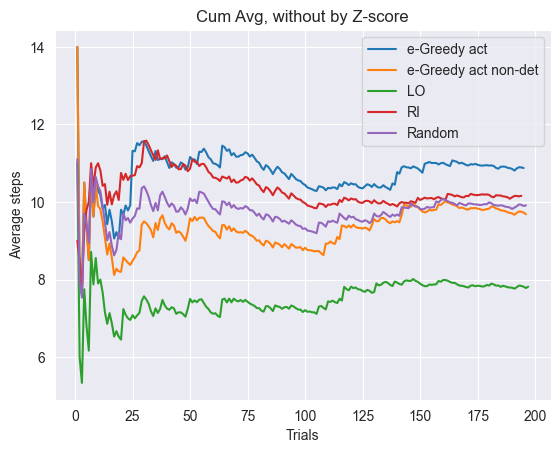

In [18]:
comp_data = {
    "e-Greedy act": (steps_eg_z, "-"),
    "e-Greedy act non-det": (steps_eg_non_z, "-"),
    "LO": (stepsLO_z, "-"),
    "RI": (stepsRI_z, "-"),
    "Random": (stepsRand_z, "-"),
}

draw_cumulative_avg_comparison(comp_data, title="Cum Avg, without by Z-score")

In [19]:
def get_outliers(x, axis=None, bar=1.5):
    d_iqr = iqr(x, axis=axis)
    d_q3 = np.percentile(x, 95, axis=axis)
    iqr_distance = np.multiply(d_iqr, bar)

    stat_shape = list(x.shape)
    stat_shape[axis] = 1

    upper_range = d_q3 + iqr_distance
    upper_outlier = np.greater(x - upper_range.reshape(stat_shape), 0)

    return [False if res else True for res in upper_outlier]

In [20]:
stepsLO_iqr = stepsLO[get_outliers(x=stepsLO, axis=0)]
stepsRI_iqr = stepsRI[get_outliers(x=stepsRI, axis=0)]
stepsRand_iqr = stepsRand[get_outliers(x=stepsRand, axis=0)]
steps_eg_iqr = steps_e_greedy[get_outliers(x=steps_e_greedy, axis=0)]
steps_eg_non_iqr = steps_e_greedy_non_d[get_outliers(x=steps_e_greedy_non_d, axis=0)]

In [21]:
print("After IQR len of steps arrays")
print(f"LO: {len(stepsLO_iqr)}")
print(f"RI: {len(stepsRI_iqr)}")
print(f"Rand: {len(stepsRand_iqr)}")
print(f"eG: {len(steps_eg_iqr)}")
print(f"eGn: {len(steps_eg_non_iqr)}")

After IQR len of steps arrays
LO: 195
RI: 194
Rand: 196
eG: 193
eGn: 194


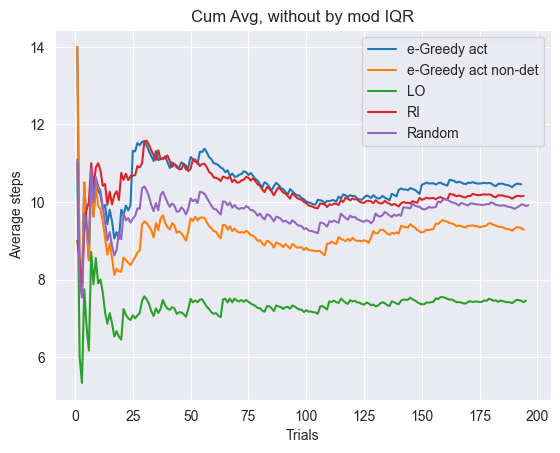

In [22]:
comp_data = {
    "e-Greedy act": (steps_eg_iqr, "-"),
    "e-Greedy act non-det": (steps_eg_non_iqr, "-"),
    "LO": (stepsLO_iqr, "-"),
    "RI": (stepsRI_iqr, "-"),
    "Random": (stepsRand_iqr, "-"),
}

draw_cumulative_avg_comparison(comp_data, title="Cum Avg, without by mod IQR")

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 43.00it/s]


number of not normalized terms: 0
          sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm          0.010977  1598.904412 -1946.159574     inf      0.086297   
chi2             0.014040  1844.186063 -1896.933513     inf      0.122303   
rayleigh         0.022582  2514.190751 -1807.189323     inf      0.284495   
exponpow         0.023063  1609.593312 -1797.670280     inf      0.192670   
norm             0.026516  2525.127608 -1775.071031     inf      0.267326   

             ks_pvalue  
lognorm   9.584172e-02  
chi2      4.583445e-03  
rayleigh  8.095619e-15  
exponpow  5.610367e-07  
norm      4.138384e-13  
{'lognorm': {'s': 0.8246113435236295, 'loc': 0.43530112171226376, 'scale': 8.606575070304668}}
Norm distribution: (13.265, 17.893148828532112)


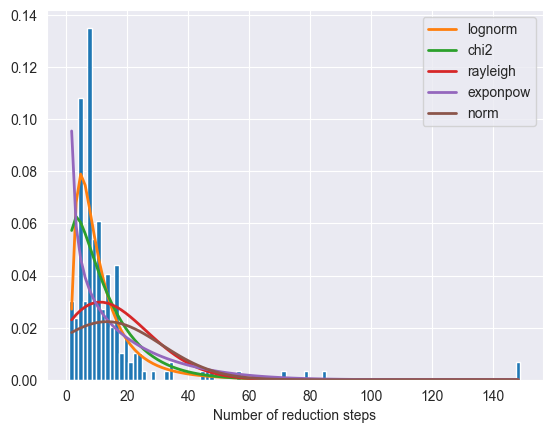

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 36.69it/s]

Log Norm distribution params: (2.218663828584073, 0.774764999664332); expected value = 12.413619677425839


In [23]:
draw_hist(steps_e_greedy)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 30.07it/s]


number of not normalized terms: 0
          sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm          0.015668  1476.666948 -1874.997865     inf      0.082811   
chi2             0.017243  1612.221815 -1855.834029     inf      0.117268   
exponpow         0.022291  1279.999648 -1804.480701     inf      0.191382   
rayleigh         0.026053  2676.313866 -1778.592016     inf      0.249581   
norm             0.030893  2810.897563 -1744.515016     inf      0.221322   

             ks_pvalue  
lognorm   1.216586e-01  
chi2      7.470679e-03  
exponpow  6.865285e-07  
rayleigh  1.835817e-11  
norm      4.378598e-09  
{'lognorm': {'s': 0.8589361440546109, 'loc': -0.04463835512575126, 'scale': 7.550751074525184}}
Norm distribution: (11.065, 13.10994946595905)


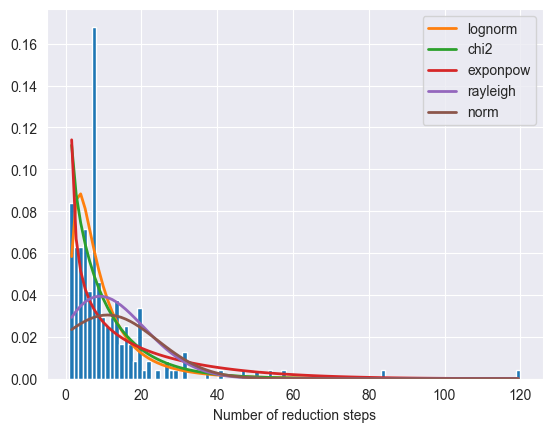

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 27.68it/s]

Log Norm distribution params: (2.0130201593941317, 0.8664116546789349); expected value = 10.895553138801843


In [24]:
draw_hist(steps_e_greedy_non_d)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 37.20it/s]


number of not normalized terms: 0
          sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm          0.004295  1638.814986 -2145.571305     inf      0.093992   
chi2             0.009324  1855.606647 -1989.768851     inf      0.177407   
exponpow         0.018780  1195.833703 -1849.016825     inf      0.334901   
powerlaw         0.023939  1221.144966 -1800.237094     inf      0.380454   
rayleigh         0.025467  3547.278432 -1793.098763     inf      0.287081   

             ks_pvalue  
lognorm   5.370896e-02  
chi2      5.265803e-06  
exponpow  1.326401e-20  
powerlaw  1.156190e-26  
rayleigh  3.698950e-15  
{'lognorm': {'s': 1.020036804220506, 'loc': 0.3294743899187258, 'scale': 5.344148121453554}}
Norm distribution: (9.592039800995025, 15.198610054228823)


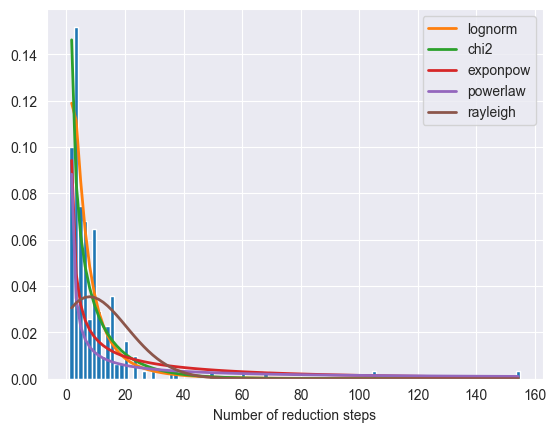

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 28.57it/s]

Log Norm distribution params: (1.7693738330973785, 0.9330348580288392); expected value = 9.067085298946383


In [25]:
draw_hist(stepsLO)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 38.27it/s]


number of not normalized terms: 7
          sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm          0.392463   879.888838 -1187.611481     inf      0.064783   
gamma            0.392913   886.190424 -1187.389172     inf      0.073886   
rayleigh         0.398079   944.727680 -1190.123149     inf      0.126409   
norm             0.409055  1018.334310 -1184.846597     inf      0.147295   
uniform          0.475700   709.272105 -1155.564372     inf      0.428441   

             ks_pvalue  
lognorm   3.735634e-01  
gamma     2.285664e-01  
rayleigh  3.674125e-03  
norm      3.878158e-04  
uniform   7.484265e-33  
{'lognorm': {'s': 0.45330852934284627, 'loc': -2.110104062929025, 'scale': 11.081434460618567}}
Norm distribution: (10.15979381443299, 5.723908256661998)


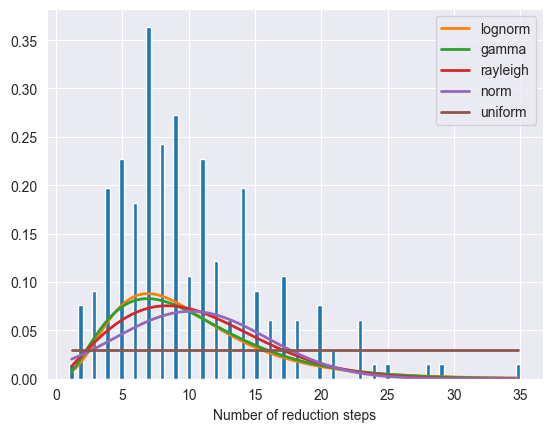

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 27.87it/s]

Log Norm distribution params: (2.158620039372709, 0.5887777667972414); expected value = 10.297999661052998


In [26]:
draw_hist(stepsRI)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 30.30it/s]


number of not normalized terms: 0
          sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm          0.003982  1397.273778 -2160.759886     inf      0.052235   
chi2             0.007504  1576.652848 -2033.423420     inf      0.104683   
rayleigh         0.019839  2216.134373 -1843.299398     inf      0.239827   
exponpow         0.020373  1463.889561 -1832.653260     inf      0.159407   
norm             0.025351  2305.519558 -1794.016869     inf      0.207859   

             ks_pvalue  
lognorm   6.238746e-01  
chi2      2.264037e-02  
rayleigh  1.168859e-10  
exponpow  6.277644e-05  
norm      4.279946e-08  
{'lognorm': {'s': 0.817400372015912, 'loc': 0.4455934914328926, 'scale': 7.68766255693653}}
Norm distribution: (11.45870646766169, 12.399576157032053)


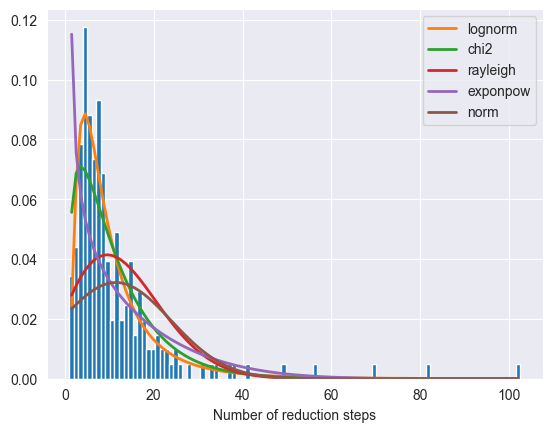

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 35.23it/s]

Log Norm distribution params: (2.114714746274147, 0.7613529876235433); expected value = 11.073378918340314


In [27]:
draw_hist(stepsRand)